# Chapter 3: Multiple regression in action


## Initialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# Loading data from the Excel file instead of using the Boston dataset

data_path = "C:\\Users\\baegs\\OneDrive\\바탕 화면\\xls\\Reconstructed data .xlsx"
df = pd.read_excel(data_path)

# Display the first few rows to confirm
df.head()


,Common or trade name,Chemical formula,CAS No.,AR5 GWP (100 year),Bond dissociation energy (eV),B.p(C),Molecular Weight (g/mol),XLogP3-AA,Hydrogen Bond Acceptor Count,Rotatable Bond Count,...,Undefined Atom Stereocenter Count,Defined Bond Stereocenter Count,1H NMR Spectra,13C NMR Spectra,17O NMR Spectra,19F NMR Spectra,Total Peaks,m/z Top Peaks,m/z 2nd Highest,m/z 3nd Highest
0,"Perfluorobuta-1,3-diene",CF2=CFCF=CF2,685–63–2,0.003,6.752952,6.0,162.03,1.8,6.0,1.000000e+00,...,5.106346e-11,-3.542459e-11,7.209230,675.347474,34.173470,-94.0,50.000000,93.000000,162.000000,31.000000
1,HFC-1141; VF,"C2H3F, CH2=CHF",75–02–5,0.020,6.922651,-72.2,46.04,1.0,1.0,-3.438454e-10,...,-6.386333e-11,7.622987e-11,-0.809065,147.000000,52.047409,-115.0,22.000000,46.000000,45.000000,27.000000
2,PFC-1216; Dyneon HFP,C3F6; CF3CF=CF2,116–15–4,0.050,6.636173,-28.0,150.02,1.9,6.0,-3.986533e-11,...,-3.033135e-11,6.124573e-12,9.574244,471.565869,35.645529,-69.0,38.000000,131.000000,69.000000,100.000000
3,"R-1132a, 1,1-DIFLUOROETHYLENE, VF2",C2H2F2,75-38-7,0.052,7.000133,-83.0,64.03,1.3,2.0,-1.834384e-10,...,2.298431e-11,-4.662205e-11,4.311988,-251.095864,34.433978,-147.0,24.000000,64.000000,45.000000,31.000000
4,HFO–1345zfc,C2F5CH=CH2,374–27–6,0.090,6.575492,3.0,146.06,2.6,5.0,1.000000e+00,...,-3.470835e-12,3.560804e-12,4.780230,248.351716,38.469678,-88.0,67.789695,17.813058,58.154657,93.004109


In [2]:
%matplotlib inline 
# If you are using IPython, this will make the images available in the notebook

In [3]:
# Load the Excel file
excel_file_path = "C:\\Users\\baegs\\OneDrive\\바탕 화면\\xls\\Reconstructed data .xlsx"
df_excel = pd.read_excel(excel_file_path)

# Assuming "AR5 GWP (100 year)" is referred to as "gwp" and is the dependent variable
# Rename the column for consistency if needed
if "AR5 GWP (100 year)" in df_excel.columns:
    df_excel.rename(columns={"AR5 GWP (100 year)": "gwp"}, inplace=True)
elif "gwp" not in df_excel.columns:
    # If the column is named differently, an additional check or rename operation might be needed
    print("The column for 'gwp' (AR5 GWP (100 year)) is not found. Please check the column names.")

# Create a DataFrame with independent variables (excluding 'gwp')
independent_vars = df_excel.drop(columns=['gwp'])

# Add the dependent variable 'gwp'
dependent_var = df_excel['gwp']

# Display the structure of the DataFrame to confirm
independent_vars.head(), dependent_var.head()


(                 Common or trade name Chemical formula   CAS No.  \
 0             Perfluorobuta-1,3-diene     CF2=CFCF=CF2  685–63–2   
 1                        HFC-1141; VF   C2H3F, CH2=CHF   75–02–5   
 2                PFC-1216; Dyneon HFP  C3F6; CF3CF=CF2  116–15–4   
 3  R-1132a, 1,1-DIFLUOROETHYLENE, VF2           C2H2F2   75-38-7   
 4                         HFO–1345zfc       C2F5CH=CH2  374–27–6   
 
    Bond dissociation energy (eV)  B.p(C)  Molecular Weight (g/mol)  XLogP3-AA  \
 0                       6.752952     6.0                    162.03        1.8   
 1                       6.922651   -72.2                     46.04        1.0   
 2                       6.636173   -28.0                    150.02        1.9   
 3                       7.000133   -83.0                     64.03        1.3   
 4                       6.575492     3.0                    146.06        2.6   
 
    Hydrogen Bond Acceptor Count   Rotatable Bond Count  Exact Mass (g/mol)  \
 0         

In [4]:
# Adjusting the provided code to work with the newly created DataFrame
observations = len(df_excel)  # Total number of observations
variables = independent_vars.columns  # Independent variable names
X = independent_vars  # Independent variables DataFrame
y = dependent_var.values  # Dependent variable 'gwp' as a numpy array

observations, variables, X.head(), y[:5]  # Display the adjusted variables and a preview of X and y


(87,
 Index(['Common or trade name', 'Chemical formula', 'CAS No.',
        'Bond dissociation energy (eV)', 'B.p(C)', 'Molecular Weight (g/mol)',
        'XLogP3-AA', 'Hydrogen Bond Acceptor Count', ' Rotatable Bond Count',
        'Exact Mass (g/mol)', 'Monoisotopic Mass (g/mol)', 'Heavy Atom Count',
        'Complexity', 'Undefined Atom Stereocenter Count ',
        'Defined Bond Stereocenter Count ', '1H NMR Spectra', '13C NMR Spectra',
        '17O NMR Spectra', '19F NMR Spectra', 'Total Peaks', 'm/z Top Peaks',
        'm/z 2nd Highest', 'm/z 3nd Highest'],
       dtype='object'),
                  Common or trade name Chemical formula   CAS No.  \
 0             Perfluorobuta-1,3-diene     CF2=CFCF=CF2  685–63–2   
 1                        HFC-1141; VF   C2H3F, CH2=CHF   75–02–5   
 2                PFC-1216; Dyneon HFP  C3F6; CF3CF=CF2  116–15–4   
 3  R-1132a, 1,1-DIFLUOROETHYLENE, VF2           C2H2F2   75-38-7   
 4                         HFO–1345zfc       C2F5CH=CH2  374–

## Using multiple features

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
# Ensure numpy is imported
import numpy as np

# Retry removing non-numeric columns from X and fitting the model
X_numeric = X.select_dtypes(include=[np.number])
print(X_numeric)
variables.drop('Common or trade name', 'Chemical formula', 'CAS No.', 'gwp') # Independent variable names (correction)

# Add a constant term to the numeric independent variables for the intercept
Xc_numeric = sm.add_constant(X_numeric)

# Create an OLS model with the numeric data
linear_regression_numeric = sm.OLS(y, Xc_numeric)

# Fit the model
fitted_model_numeric = linear_regression_numeric.fit()

# Display the summary of the fitted model
fitted_model_numeric_summary = fitted_model_numeric.summary()
fitted_model_numeric_summary


    Bond dissociation energy (eV)  B.p(C)  Molecular Weight (g/mol)  \
0                        6.752952    6.00                    162.03   
1                        6.922651  -72.20                     46.04   
2                        6.636173  -28.00                    150.02   
3                        7.000133  -83.00                     64.03   
4                        6.575492    3.00                    146.06   
..                            ...     ...                       ...   
82                       6.601533   27.30                    150.05   
83                       6.732164   28.00                    150.05   
84                       6.602307   37.40                    236.04   
85                       6.540338   11.95                    150.50   
86                       6.638148   23.00                    168.04   

    XLogP3-AA  Hydrogen Bond Acceptor Count   Rotatable Bond Count  \
0         1.8                           6.0           1.000000e+00   
1      

TypeError: Index.drop() takes from 2 to 3 positional arguments but 5 were given

In [7]:
type(variables)

pandas.core.indexes.base.Index

In [24]:
# Assuming 'df' is your DataFrame
variables1=variables.drop(['Common or trade name', 'Chemical formula', 'CAS No.'])
print(variables1)

Index(['Bond dissociation energy (eV)', 'B.p(C)', 'Molecular Weight (g/mol)',
       'XLogP3-AA', 'Hydrogen Bond Acceptor Count', ' Rotatable Bond Count',
       'Exact Mass (g/mol)', 'Monoisotopic Mass (g/mol)', 'Heavy Atom Count',
       'Complexity', 'Undefined Atom Stereocenter Count ',
       'Defined Bond Stereocenter Count ', '1H NMR Spectra', '13C NMR Spectra',
       '17O NMR Spectra', '19F NMR Spectra', 'Total Peaks', 'm/z Top Peaks',
       'm/z 2nd Highest', 'm/z 3nd Highest'],
      dtype='object')


In [10]:
# As an alternative, this example is using the statsmodels.formula.api module
# Equivalent to the R syntax for linear models, it requires to specify the form
# of the linear regression using 'response ~ predictor1 (+ predictor2 + ...)'
#linear_regression = smf.ols(formula = 'target ~ CRIM + ZN +INDUS + CHAS + NOX + RM + AGE + DIS +\
#                                                 RAD + TAX + PTRATIO + B + LSTAT', data=dataset)
#fitted_model# = linear_regression.fit(#)

### Correlation matrix

In [11]:
# 독립 변수 데이터셋 선택 (상수항 추가 전의 X_numeric 사용)
X_numeric = X.select_dtypes(include=[np.number])

# 상관 관계 행렬 계산
correlation_matrix = X_numeric.corr()

# 상관 관계 행렬 출력
print(correlation_matrix)


                                    Bond dissociation energy (eV)    B.p(C)  \
Bond dissociation energy (eV)                            1.000000 -0.060819   
B.p(C)                                                  -0.060819  1.000000   
Molecular Weight (g/mol)                                -0.080340  0.545174   
XLogP3-AA                                               -0.103294  0.520887   
Hydrogen Bond Acceptor Count                             0.148680  0.447389   
 Rotatable Bond Count                                   -0.031203  0.606250   
Exact Mass (g/mol)                                      -0.078336  0.545335   
Monoisotopic Mass (g/mol)                               -0.077743  0.545444   
Heavy Atom Count                                         0.065927  0.565771   
Complexity                                               0.036067  0.423350   
Undefined Atom Stereocenter Count                       -0.127557  0.170806   
Defined Bond Stereocenter Count                     

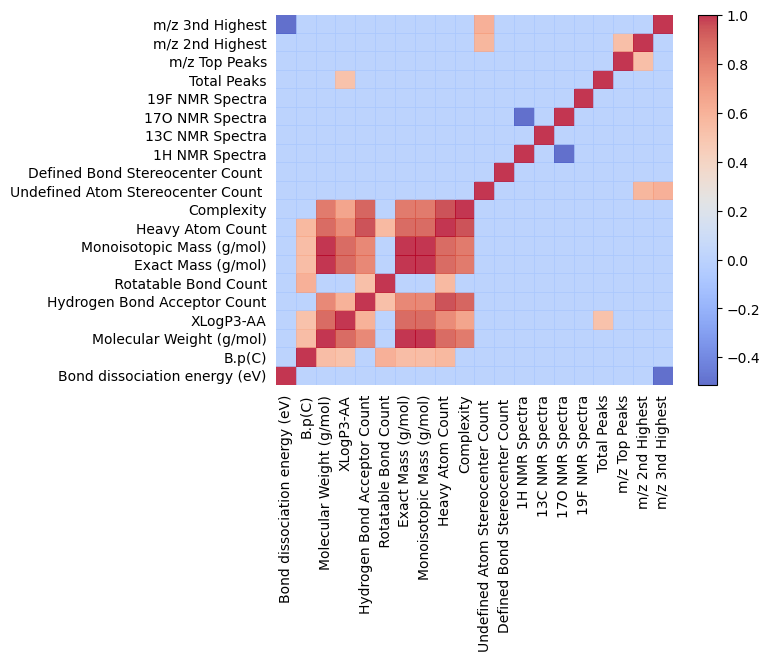

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

def visualize_correlation_matrix(data, hurdle=0.5):
    # 수치형 데이터만 선택
    data_numeric = data.select_dtypes(include=[np.number])
    variables = data_numeric.columns  # 독립 변수 이름 업데이트
    
    # 상관 관계 계산
    R = data_numeric.corr()
    R = np.array(R)  # DataFrame을 NumPy 배열로 변환
    R[np.where(np.abs(R) < hurdle)] = 0.0  # 필터링
    
    # 상관 관계 행렬 시각화
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False, rotation=90)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False) 
    plt.colorbar()
    plt.show()

# 함수 호출
visualize_correlation_matrix(X_numeric, hurdle=0.5)


In [13]:
# 상관 관계 행렬 계산
corr = np.corrcoef(X_numeric.T)  # .T를 사용하여 열별로 변수를 처리

# 고유값과 고유벡터 계산
eigenvalues, eigenvectors = np.linalg.eig(corr)

# 결과 출력
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)


Eigenvalues: [7.55222623e+00 3.06435234e+00 2.15986547e+00 1.59851688e+00
 1.23142520e+00 1.03804435e+00 7.66710735e-01 6.42790575e-01
 5.04389321e-01 4.17461911e-01 3.13264358e-01 2.73176192e-01
 2.28424612e-01 1.34856718e-01 5.17123925e-02 1.56670665e-02
 4.99541247e-03 2.10840192e-03 1.05987783e-09 1.18220404e-05]
Eigenvectors: [[-2.82389124e-02  3.02805221e-01 -5.21075097e-02 -3.30631246e-01
  -2.79870613e-01 -4.38602703e-01  4.22941909e-01 -3.87312671e-02
   6.15762598e-02  2.60477758e-01 -3.68286167e-01 -2.04378186e-01
  -1.45342210e-01 -2.59625823e-01  2.82396163e-02  3.62769143e-02
   6.31159224e-02 -2.67332686e-02  3.09651351e-03 -1.65918177e-03]
 [ 2.18525038e-01 -5.24643627e-02 -2.57705398e-01 -1.30275889e-01
  -1.32847618e-01  1.59941117e-01 -2.25667714e-01 -5.83320640e-01
   3.58455192e-01  3.50763754e-01  2.49691491e-01  1.63950735e-01
  -2.78292465e-02 -2.85456427e-01  1.05469276e-02  6.50286789e-02
   5.57896492e-02  3.50056289e-02  1.53747215e-03 -9.02902024e-04]
 [ 3.

In [14]:
print (eigenvalues)

[7.55222623e+00 3.06435234e+00 2.15986547e+00 1.59851688e+00
 1.23142520e+00 1.03804435e+00 7.66710735e-01 6.42790575e-01
 5.04389321e-01 4.17461911e-01 3.13264358e-01 2.73176192e-01
 2.28424612e-01 1.34856718e-01 5.17123925e-02 1.56670665e-02
 4.99541247e-03 2.10840192e-03 1.05987783e-09 1.18220404e-05]


In [15]:
# eigenvalue normaralization 
eigenvalues/eigenvalues.sum()*100

array([3.77611312e+01, 1.53217617e+01, 1.07993274e+01, 7.99258442e+00,
       6.15712600e+00, 5.19022174e+00, 3.83355367e+00, 3.21395288e+00,
       2.52194661e+00, 2.08730956e+00, 1.56632179e+00, 1.36588096e+00,
       1.14212306e+00, 6.74283588e-01, 2.58561963e-01, 7.83353324e-02,
       2.49770623e-02, 1.05420096e-02, 5.29938917e-09, 5.91102020e-05])

##### print (eigenvectors[:,0])

In [39]:
print (eigenvectors[:,0])

[-0.02823891  0.21852504  0.35766159  0.31438038  0.30346463  0.19731762
  0.3578312   0.35797271  0.34041449  0.32181843  0.09038481  0.01377428
  0.14513884  0.12185519 -0.15057463  0.09696497  0.12354153  0.06702753
  0.06801347  0.13153584]


In [40]:
print (variables1[7],"\n",variables1[6],"\n",variables1[2],"\n",variables1[8],"\n",variables1[9],"\n",variables1[3])

Monoisotopic Mass (g/mol) 
 Exact Mass (g/mol) 
 Molecular Weight (g/mol) 
 Heavy Atom Count 
 Complexity 
 XLogP3-AA


In [16]:
print (eigenvectors[:,1])

[ 0.30280522 -0.05246436  0.01441945 -0.08049729  0.20342629 -0.030998
  0.01657612  0.01668145  0.1046241   0.12448048 -0.42342976  0.09730386
  0.22342746  0.04092605 -0.03153359  0.30325259 -0.37788371 -0.11276882
 -0.39440646 -0.43029009]


In [17]:
np.linalg.norm(eigenvectors[:,1])

1.0

In [38]:
print (variables1[19],"\n",variables1[10],"\n",variables1[18],"\n",variables1[16],"\n",variables1[15],"\n",variables1[0])

m/z 3nd Highest 
 Undefined Atom Stereocenter Count  
 m/z 2nd Highest 
 Total Peaks 
 19F NMR Spectra 
 Bond dissociation energy (eV)


In [19]:
print (eigenvectors[:,19])

[-1.65918177e-03 -9.02902024e-04 -8.09946840e-01  7.06538497e-03
 -1.72358783e-02  8.25417544e-03  2.82832539e-01  5.13176713e-01
  1.05048989e-02  2.57432273e-03  5.19292841e-03  9.56695078e-04
  6.41189644e-03  1.74613691e-03 -7.69393474e-04  3.73111200e-03
 -1.52371111e-03  3.67641156e-03 -1.38236170e-03 -1.24590690e-03]


In [25]:
variables1

Index(['Bond dissociation energy (eV)', 'B.p(C)', 'Molecular Weight (g/mol)',
       'XLogP3-AA', 'Hydrogen Bond Acceptor Count', ' Rotatable Bond Count',
       'Exact Mass (g/mol)', 'Monoisotopic Mass (g/mol)', 'Heavy Atom Count',
       'Complexity', 'Undefined Atom Stereocenter Count ',
       'Defined Bond Stereocenter Count ', '1H NMR Spectra', '13C NMR Spectra',
       '17O NMR Spectra', '19F NMR Spectra', 'Total Peaks', 'm/z Top Peaks',
       'm/z 2nd Highest', 'm/z 3nd Highest'],
      dtype='object')

## Revisiting gradient descent

In [ ]:
from sklearn.preprocessing import StandardScaler

# 'df_excel'에서 종속 변수 'y' 설정 (이미 설정되어 있음)
# 독립 변수 데이터셋 준비 (이미 'X_numeric'으로 정의되어 있음)

# 관측치 수와 변수 이름 업데이트
observations = len(df_excel)
variables = df_excel.columns[:-1]  # 종속 변수를 제외한 모든 변수

# 표준화 객체 생성
standardization = StandardScaler()

# 독립 변수 데이터 표준화
Xst = standardization.fit_transform(X_numeric)

# 표준화된 데이터의 원래 평균과 표준편차
original_means = standardization.mean_
original_stds = standardization.scale_  # .std_ 대신 .scale_ 사용

# 표준화된 데이터에 절편 항 추가
Xst = np.column_stack((Xst, np.ones(observations)))

# 종속 변수 'y' 설정
# 'y'는 이미 'dependent_var'로 정의되어 있거나, 'df_excel'에서 직접 선택해야 할 수 있음
# 예: y = df_excel['gwp'].values (종속 변수 이름 확인 필요)


In [ ]:
import random
import numpy as np

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha=0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha=0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha=alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path
                                  
alpha = 0.01
w, path = optimize(Xst, y, alpha, eta = 10**-12, iterations = 20000)
print ("These are our final standardized coefficients: " + ', '.join(map(lambda x: "%0.4f" % x, w)))                                   

In [ ]:
# 모델 계수 추출
w = fitted_model_numeric.params

# 표준화되지 않은 계수 계산
unstandardized_betas = w[:-1] / original_stds

# 표준화되지 않은 절편 계산
unstandardized_bias = w[-1] - np.sum((original_means / original_stds) * w[:-1])

# 결과 출력
print('%8s: %8.4f' % ('bias', unstandardized_bias))
for beta, varname in zip(unstandardized_betas, variables[:-1]):  # 종속 변수를 제외한 변수 이름 사용
    print('%8s: %8.4f' % (varname, beta))


## Figuring out importat features

### Working with standardized coefficients

In [ ]:
# 선형 회귀 모델 생성 및 적합
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression(fit_intercept=True)
linear_regression.fit(Xst, y)

# 모델 계수와 절편 출력
print("Model coefficients:", linear_regression.coef_)
print("Model intercept:", linear_regression.intercept_)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 선형 회귀 모델 인스턴스 생성
linear_regression = LinearRegression()

# 표준화 및 선형 회귀 모델을 포함하는 파이프라인 생성
Stand_coef_linear_reg = make_pipeline(StandardScaler(), linear_regression)

# 파이프라인을 사용하여 모델 적합 (예시: X_numeric, y 사용)
# Stand_coef_linear_reg.fit(X_numeric, y)

# 참고: X_numeric 대신 원본 데이터 X 사용 가능. 파이프라인이 자동으로 데이터를 표준화합니다.
# Stand_coef_linear_reg.fit(X, y)


In [ ]:
# 파이프라인을 사용하여 모델 적합
Stand_coef_linear_reg.fit(X_numeric, y)

# 선형 회귀 모델의 계수를 가져옴
linear_regression_coefs = Stand_coef_linear_reg.named_steps['linearregression'].coef_

# 계수와 변수 이름을 출력
variables = X_numeric.columns  # 수치형 변수 이름
for coef, var in sorted(zip(map(abs, linear_regression_coefs), variables), reverse=True):
    print("%6.3f %s" % (coef, var))



In [ ]:
# 파이프라인을 사용하여 모델 적합 (X 대신 X_numeric 사용)
Stand_coef_linear_reg.fit(X_numeric, y)

# 파이프라인에서 선형 회귀 모델의 계수를 가져옴
# 파이프라인의 선형 회귀 단계에서 계수에 접근
linear_regression_coefs = Stand_coef_linear_reg.named_steps['linearregression'].coef_

# 표준화된 계수와 변수 이름을 출력
# X_numeric.columns를 사용하여 수치형 변수 이름을 가져옴
variables = X_numeric.columns
for coef, var in sorted(zip(map(abs, linear_regression_coefs), variables), reverse=True):
    print("%6.3f %s" % (coef, var))


### Using R squared

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 선형 회귀 모델을 표준화 파이프라인과 함께 생성
linear_regression_pipeline = make_pipeline(StandardScaler(), LinearRegression(fit_intercept=True))

def r2_est(X, y):
    # 파이프라인을 사용하여 모델 적합 및 예측
    y_pred = linear_regression_pipeline.fit(X, y).predict(X)
    # R² 점수 계산
    return r2_score(y, y_pred)

# R² 점수 출력
# X와 y는 모델 적합에 사용될 독립 변수와 종속 변수
print('Baseline R2: %0.3f' % r2_est(X_numeric, y))


In [ ]:
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 파이프라인을 사용하여 표준화 및 선형 회귀 모델 생성
linear_regression_pipeline = make_pipeline(StandardScaler(), LinearRegression(fit_intercept=True))

def r2_est(X, y):
    """주어진 X와 y에 대한 R² 점수를 계산합니다."""
    return r2_score(y, linear_regression_pipeline.fit(X, y).predict(X))

r2_impact = list()
for j in range(X_numeric.shape[1]):
    selection = [i for i in range(X_numeric.shape[1]) if i != j]
    # 선택된 변수를 제외하고 R² 점수 영향을 계산
    r2_impact.append((r2_est(X_numeric, y) - r2_est(X_numeric.iloc[:, selection], y), X_numeric.columns[j]))

for imp, varname in sorted(r2_impact, reverse=True):
    print('%6.3f %s' % (imp, varname))


## Interaction model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import pandas as pd

# 선형 회귀 모델 생성
linear_regression = LinearRegression(fit_intercept=True)

# 2차 상호작용만 포함하는 폴리노미얼 특성 생성기
create_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)



In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import pandas as pd

# 데이터 로드 및 전처리
# 이 부분은 앞서 정의한 X_numeric과 y를 사용합니다.
# 예시: X_numeric, y = 데이터 로드 및 필터링 코드

# 선형 회귀 모델을 표준화와 함께 파이프라인으로 생성
linear_regression_pipeline = make_pipeline(StandardScaler(), LinearRegression(fit_intercept=True))

def r2_est(X, y):
    """주어진 X와 y에 대한 R² 점수를 계산합니다."""
    return r2_score(y, linear_regression_pipeline.fit(X, y).predict(X))

# X 대신 X_numeric을 사용하여 기본 모델의 R² 점수 계산
baseline = r2_est(X_numeric, y)
print('Baseline R2: %0.3f' % baseline)


In [ ]:
# 폴리노미얼 특성을 포함한 상호작용 데이터 생성
Xi = create_interactions.fit_transform(X_numeric)

# 원본 입력 특성의 수를 X_numeric을 사용하여 직접 얻음
main_effects = X_numeric.shape[1]



In [ ]:
# 변수 이름을 X_numeric의 열 이름으로 설정
variables = X_numeric.columns

# 상호작용 효과 평가 및 출력
for k, effect in enumerate(create_interactions.powers_[(main_effects):]):
    # 해당 상호작용에 해당하는 변수 이름 추출
    termA, termB = variables[effect == 1]
    
    # 선택된 변수와 상호작용 항을 포함하여 R² 점수 계산
    selected_features = list(range(main_effects)) + [main_effects + k]
    Xi_selected = Xi[:, selected_features]
    increment = r2_est(Xi_selected, y) - baseline
    
    # R² 점수가 0.01 이상 증가하는 상호작용 항 출력
    if increment > 0.01:
        print('Adding interaction %8s * %8s R2: %5.3f' % (termA, termB, increment))


In [ ]:
# 데이터셋의 수치형 데이터만 선택하기 위해 pandas의 select_dtypes 사용
X_numeric = X.select_dtypes(include=[np.number])

# 필요한 변수 'Complexity'와 'Hydrogen Bond Acceptor Count'가 수치형 데이터셋에 있는지 확인
if 'Complexity' in X_numeric.columns and 'Hydrogen Bond Acceptor Count' in X_numeric.columns:
    # 상호작용 특성 생성
    Xi = X_numeric.copy()
    Xi['interaction'] = X_numeric['Complexity'] * X_numeric['Hydrogen Bond Acceptor Count']
    
    # 상호작용 특성을 포함한 모델의 R² 점수 계산
    print('R2 of a model with Complexity * Hydrogen Bond Acceptor Count interaction: %0.3f' % r2_est(Xi, y))
else:
    print("필요한 변수가 데이터셋에 없습니다.")


## Polynomial regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

# 선형 회귀 모델 생성
linear_regression = LinearRegression(fit_intercept=True)

# 3차 및 7차 다항 특성 생성기
create_cubic = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
create_highdegree = PolynomialFeatures(degree=7, interaction_only=False, include_bias=False)

# 선형, 세제곱, 7차 예측 모델을 위한 파이프라인 생성
linear_predictor = make_pipeline(StandardScaler(), linear_regression)
cubic_predictor = make_pipeline(StandardScaler(), create_cubic, linear_regression)
highdegree_predictor = make_pipeline(StandardScaler(), create_highdegree, linear_regression)


In [ ]:
# 'df_excel'에서 종속 변수 'y' 설정 (이미 설정되어 있음)
# 독립 변수 데이터셋 준비 (이미 'X_numeric'으로 정의되어 있음)

# 관측치 수와 변수 이름 업데이트
observations = len(df_excel)
variables = df_excel.columns[:-1]  # 종속 변수를 제외한 모든 변수

# 표준화 객체 생성
standardization = StandardScaler()

# 독립 변수 데이터 표준화
Xst = standardization.fit_transform(X_numeric)

# 표준화된 데이터의 원래 평균과 표준편차
original_means = standardization.mean_
original_stds = standardization.scale_  # .std_ 대신 .scale_ 사용

# 표준화된 데이터에 절편 항 추가
Xst = np.column_stack((Xst, np.ones(observations)))

# 종속 변수 'y' 설정
# 'y'는 이미 'dependent_var'로 정의되어 있거나, 'df_excel'에서 직접 선택해야 할 수 있음
# 예: y = df_excel['gwp'].values (종속 변수 이름 확인 필요)

# predictor 변수 설정
predictor = 'Hydrogen Bond Acceptor Count'

# x와 xt를 설정
x = df_excel[predictor].values.reshape((observations, 1))
xt = np.arange(0, 50, 0.1).reshape((int(50 / 0.1), 1))

# x_range와 y_range 설정
x_range = [df_excel[predictor].min(), df_excel[predictor].max()]
y_range = [df_excel['gwp'].min(), df_excel['gwp'].max()]

# scatter plot 그리기
scatter = df_excel.plot(kind='scatter', x=predictor, y='gwp', xlim=x_range, ylim=y_range)

# 회귀선 그리기
regr_line = scatter.plot(xt, linear_predictor.fit(x, y).predict(xt), '-', color='red', linewidth=2)


In [ ]:
# scatter plot 그리기
scatter = df_excel.plot(kind='scatter', x=predictor, y='gwp', xlim=x_range, ylim=y_range)

# 회귀선 그리기
regr_line = scatter.plot(xt, cubic_predictor.fit(x, y).predict(xt), '-', color='red', linewidth=2)


In [ ]:
for d in [1, 2, 3, 5, 15]:
    create_poly = PolynomialFeatures(degree=d, interaction_only=False, include_bias=False)
    poly = make_pipeline(create_poly, StandardScaler(), linear_regression)
    model = poly.fit(x, y)
    r2 = r2_score(y, model.predict(x))
    print("R2 degree - %2i polynomial: %0.3f" % (d, r2))


In [ ]:
scatter = df_excel.plot(kind='scatter', x=predictor, y='gwp', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, model.predict(xt), '-', color='red', linewidth=2)
